In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [2]:
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\medical cost regression.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


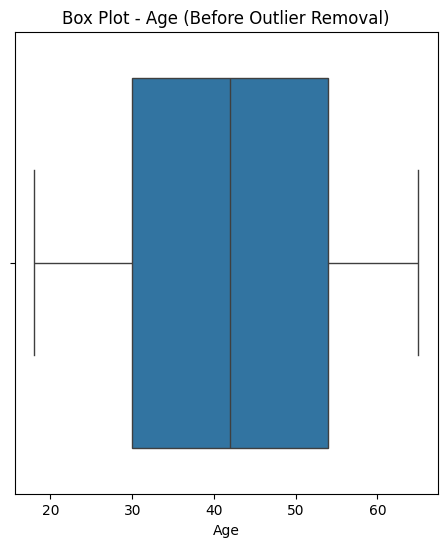

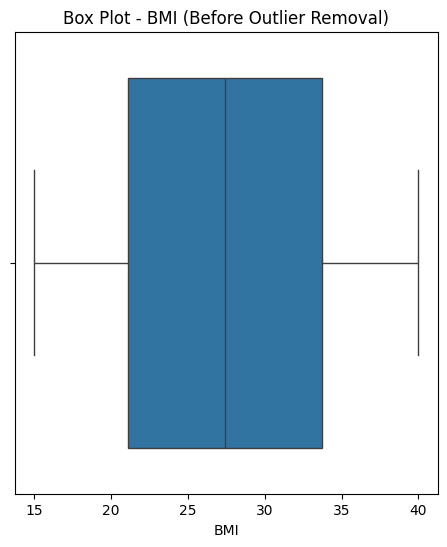

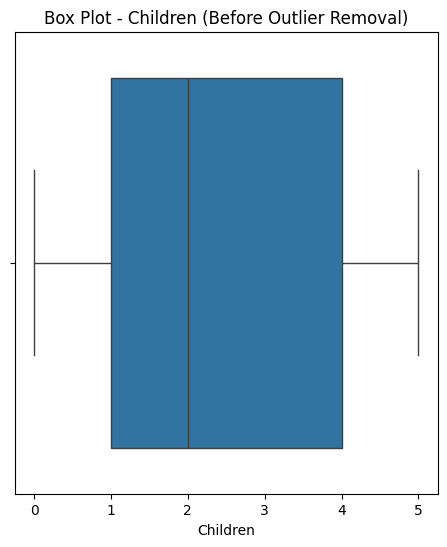

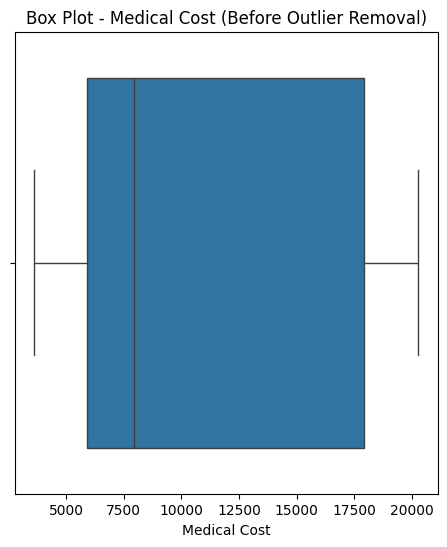

In [4]:
columns_to_check = df.drop(['Region','Sex','Smoker'],axis=1)
for col in columns_to_check:
    plt.figure(figsize=(12, 6))
    
    # Box plot before outlier removal
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot - {col} (Before Outlier Removal)')
plt.show()

<Figure size 800x500 with 0 Axes>

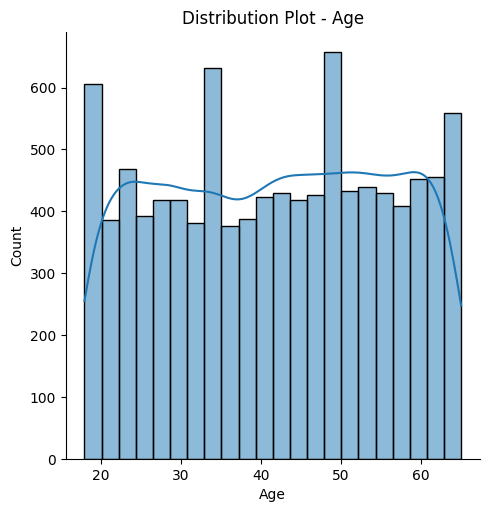

<Figure size 800x500 with 0 Axes>

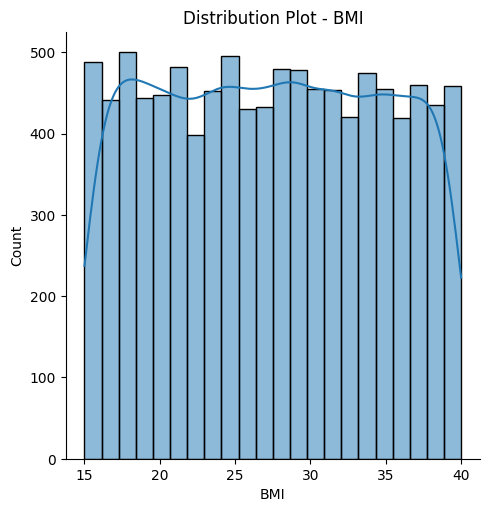

<Figure size 800x500 with 0 Axes>

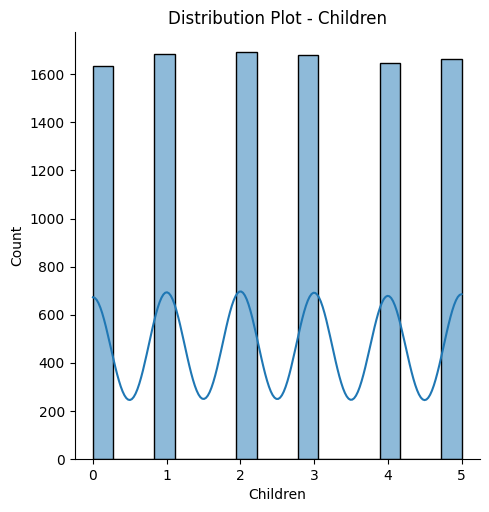

<Figure size 800x500 with 0 Axes>

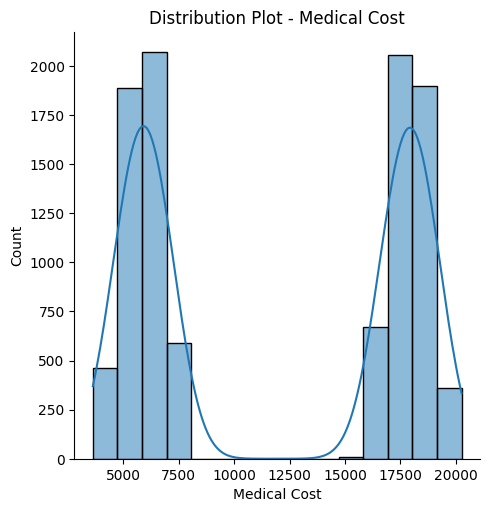

In [5]:
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.displot(df[col], kde=True)
    plt.title(f'Distribution Plot - {col}')
    plt.show()

In [6]:
df[df.duplicated()]

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost


In [7]:
df[df.duplicated(keep=False)]

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost


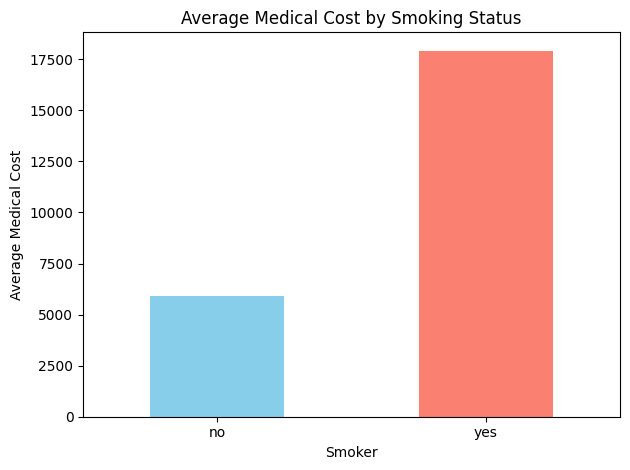

In [55]:
import matplotlib.pyplot as plt

# Grouping and calculating the mean
smoker_cost = df.groupby("Smoker")["Medical Cost"].mean()

# Plotting
smoker_cost.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Average Medical Cost by Smoking Status")
plt.ylabel("Average Medical Cost")
plt.xlabel("Smoker")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


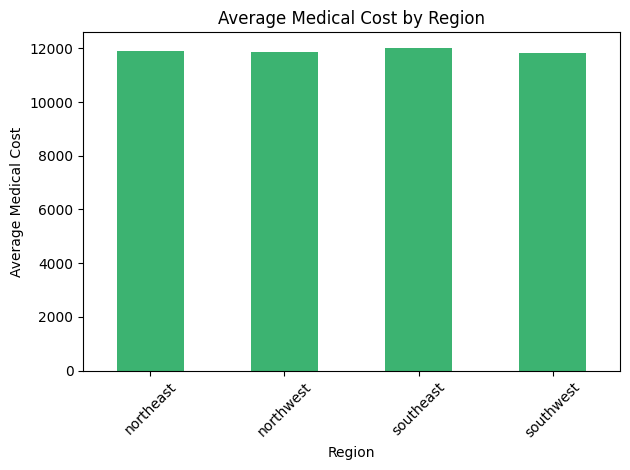

In [56]:
region_cost = df.groupby("Region")["Medical Cost"].mean()

# Plotting
region_cost.plot(kind="bar", color="mediumseagreen")
plt.title("Average Medical Cost by Region")
plt.ylabel("Average Medical Cost")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

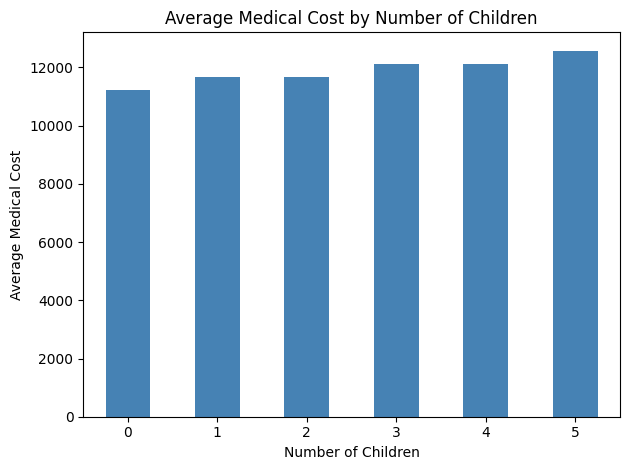

In [57]:
children_cost = df.groupby("Children")["Medical Cost"].mean()

# Plotting
children_cost.plot(kind="bar", color="steelblue")
plt.title("Average Medical Cost by Number of Children")
plt.ylabel("Average Medical Cost")
plt.xlabel("Number of Children")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
df.groupby("Sex")["Medical Cost"].mean()

Sex
female    11917.710896
male      11879.896398
Name: Medical Cost, dtype: float64

In [12]:
df.groupby("Age")["Medical Cost"].mean().sort_values()

Age
18    10125.988841
26    10196.193268
25    10581.576096
22    10608.050960
21    10721.503191
38    10774.048254
20    10801.137196
19    10827.987619
29    10877.033694
37    11001.356368
28    11067.386327
24    11138.083729
33    11169.733710
32    11200.813000
23    11341.695708
34    11480.407678
31    11536.515340
42    11577.715578
27    11585.579378
35    11602.944050
41    11651.983946
44    11779.841944
47    11813.598342
36    11953.637754
40    11992.037550
39    12078.579242
59    12084.352952
54    12117.522617
55    12194.903788
58    12278.377330
48    12279.833305
30    12347.154847
45    12372.139409
52    12415.838047
51    12455.718433
43    12526.817217
53    12537.618540
50    12606.740856
49    12718.832129
62    12817.176923
57    12859.094433
46    12942.611667
65    13079.118646
64    13143.597151
61    13175.428739
63    13228.526630
60    13285.558356
56    13466.620086
Name: Medical Cost, dtype: float64

In [13]:
df.groupby("Smoker")["Age"].sum().sort_values()

Smoker
no     207875
yes    208909
Name: Age, dtype: int64

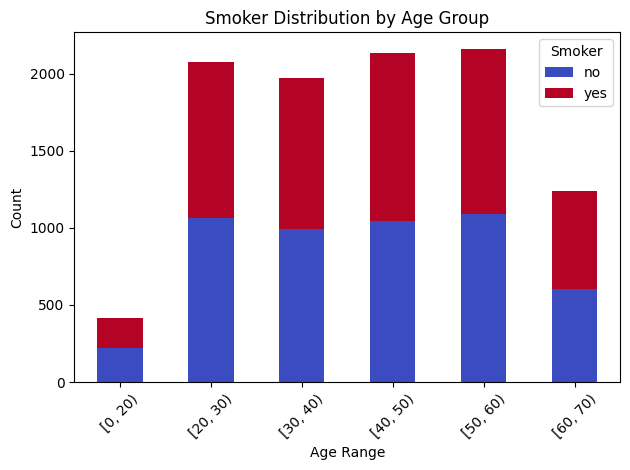

In [14]:
pd.crosstab(
    pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], right=False),
    df['Smoker']
).plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title('Smoker Distribution by Age Group')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', OneHotEncoder(), ["Sex", "Smoker", "Region"]),
        ('tnf2', StandardScaler(), ["Age", "BMI", "Children"])
    ],
    remainder="passthrough"
)


In [16]:
X=df.drop("Medical Cost",axis=1)
y=df["Medical Cost"]

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)


In [18]:
X_train_trf=transformer.fit_transform(X_train)
X_test_trf=transformer.transform(X_test)

In [19]:
lr=LinearRegression()
lr.fit(X_train_trf,y_train)
y_pred=lr.predict(X_test_trf)
score=r2_score(y_pred,y_test)
score

0.9977408399225347

In [20]:
score1=mean_absolute_error(y_pred,y_test)
score1

250.13660758880653

In [21]:
# Checking if the model is Overfitting
print("model on test data",np.mean(cross_val_score(lr,X_test_trf,y_test,cv=5,scoring="r2")))
print("model on training data",np.mean(cross_val_score(lr,X_train_trf,y_train,cv=5,scoring="r2")))

model on test data 0.9977271257784501
model on training data 0.9977098735521348


In [25]:
df.columns

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Medical Cost'], dtype='object')

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_trf, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_rf = rf_model.predict(X_test_trf)
r2 = r2_score(y_test, y_pred_rf)
print("R² Score:", r2)

R² Score: 0.9973039279455067


In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(rf_model,X_test_trf,y_test,cv=5).mean()

0.9970670962890633

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_trf, y_train)
y_pred_gb = gb_model.predict(X_test_trf)

In [41]:
r2 = r2_score(y_test, y_pred_gb)
print("R² Score:", r2)

R² Score: 0.9976575465426418


In [42]:
from sklearn.compose import ColumnTransformer

def get_feature_names(transformer):
    feature_names = []

    for name, transformer, cols in transformer.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(cols)
        else:
            names = cols
        feature_names.extend(names)
    
    return feature_names

feature_names = get_feature_names(transformer)

In [43]:
importances = rf_model.feature_importances_

In [44]:
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


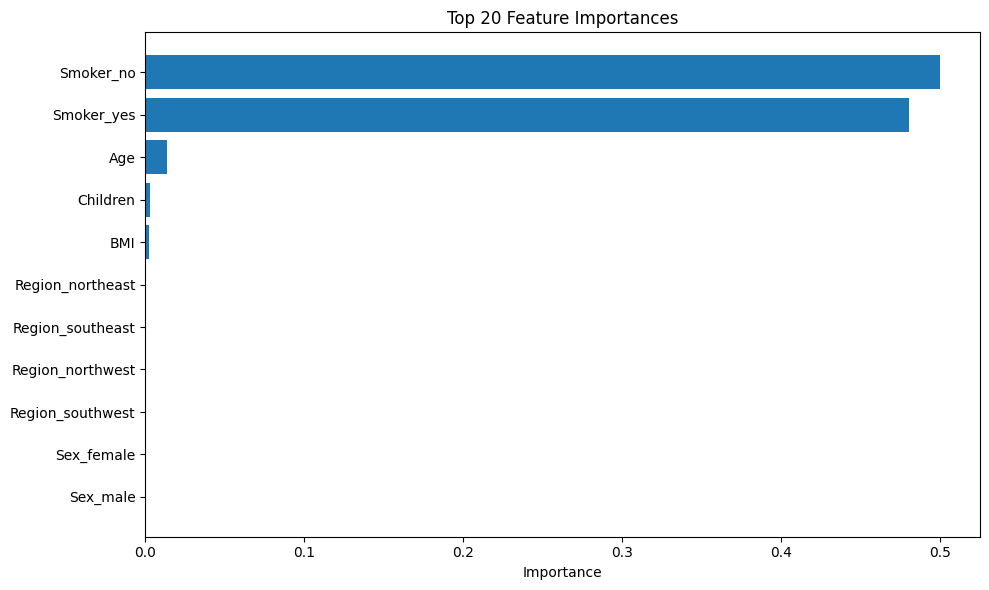

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:20], feat_imp_df["Importance"][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [22]:
from sklearn.pipeline import Pipeline
import pickle as pkl

In [23]:
pipeline=Pipeline([("transformer",transformer),
                   ("linear_regression",lr)])

In [24]:
with open("medical Cost prediction.pkl","wb") as file:
    pkl.dump(pipeline,file)